In [1]:
import glob
import pickle

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon

import utils

In [2]:
cameraData = utils.loadCameraData()

## Defining four points to transform the image

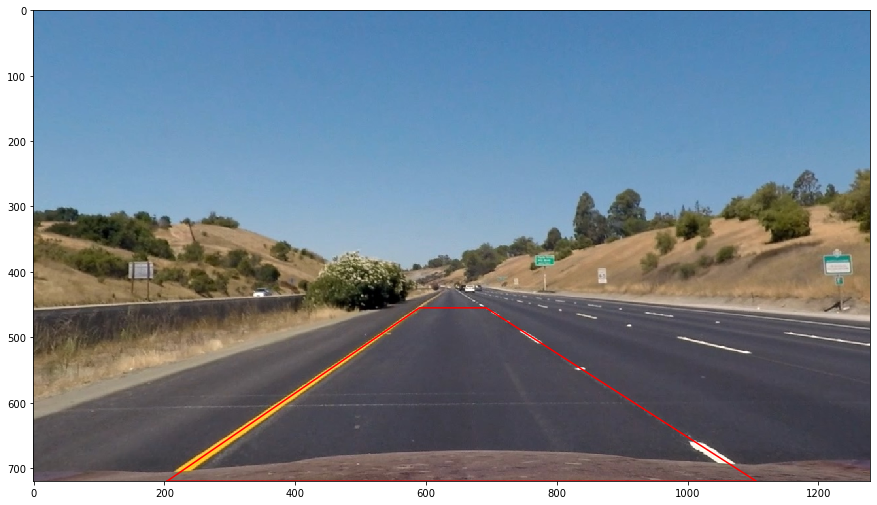

In [3]:
src_points = np.float32([[204,720], [590,455], [692, 455], [1105 ,720]])
img = cv2.imread("test_images/straight_lines1.jpg") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = utils.undistortImage(img, cameraData)

plt.figure(figsize = (15,15))
plt.plot(Polygon(src_points).get_xy()[:, 0], Polygon(src_points).get_xy()[:, 1], color="red")
plt.imshow(img)
plt.show()

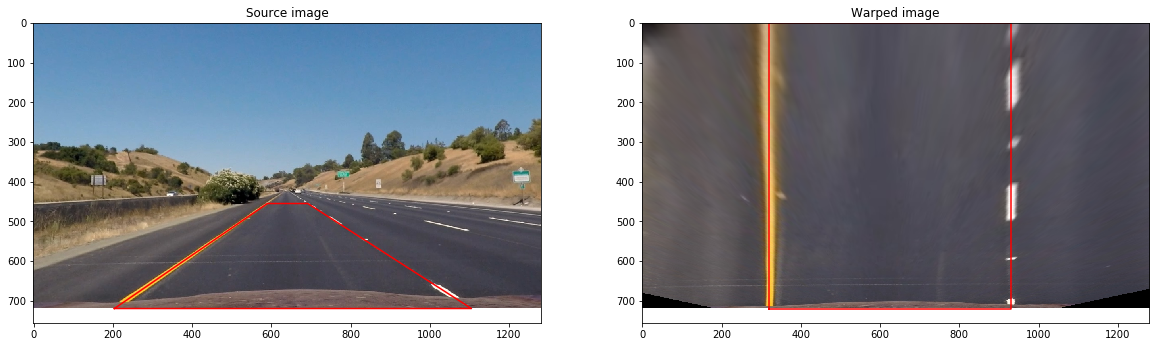

In [4]:
dst_points = np.float32([[320, 720], [320, 0], [930, 0], [930, 720]])
img_size = (img.shape[1], img.shape[0])

M = cv2.getPerspectiveTransform(src_points, dst_points)
Minv = cv2.getPerspectiveTransform(dst_points, src_points)
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("Source image")
ax1.imshow(img)
ax1.plot(Polygon(src_points).get_xy()[:, 0], Polygon(src_points).get_xy()[:, 1], color="red")
ax2.set_title("Warped image")
ax2.imshow(warped)
ax2.plot(Polygon(dst_points).get_xy()[:, 0], Polygon(dst_points).get_xy()[:, 1], color="red")
plt.show()

# Saving transformation data

In [5]:
newCameraData = {
    'M': M,
    'Minv': Minv
}

utils.saveCameraData(newCameraData)